In [2]:
import pandas as pd

In [5]:
df=pd.read_csv("emails.csv")

In [6]:
df.shape

(5172, 3002)

In [7]:
df.head()


Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

In [8]:
x=df.drop(['Email No.','Prediction'],axis=1)
y=df['Prediction']

In [9]:
x.shape

(5172, 3000)

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3000 entries, the to dry
dtypes: int64(3000)
memory usage: 118.4 MB


In [12]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [13]:
set(x.dtypes)

{dtype('int64')}

<Axes: xlabel='Prediction', ylabel='count'>

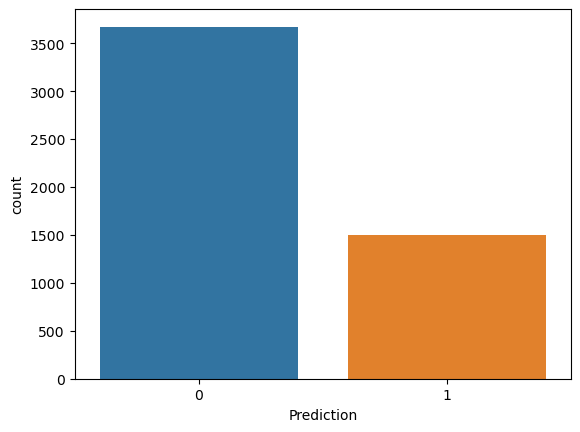

In [14]:
import seaborn as sns
sns.countplot(x=y)

In [15]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled= scaler.fit_transform(x)

In [17]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [23]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, random_state=0,test_size=0.30)



In [24]:
x_scaled.shape

(5172, 3000)

In [25]:
x_train.shape

(3620, 3000)

In [26]:
x_test.shape

(1552, 3000)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
y_pred= knn.predict(x_test)

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score, classification_report

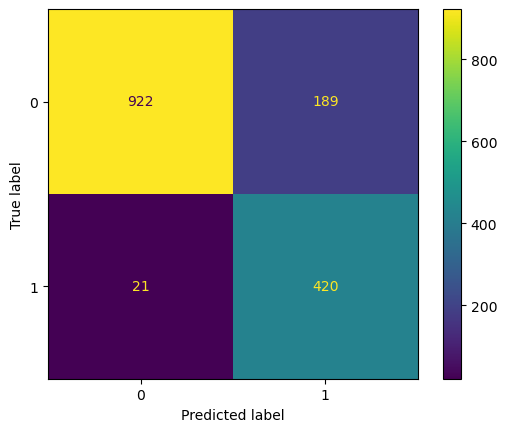

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [35]:
y_test.value_counts()

Prediction
0    1111
1     441
Name: count, dtype: int64

In [36]:
accuracy_score(y_test, y_pred)

0.8646907216494846

In [39]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1111
           1       0.69      0.95      0.80       441

    accuracy                           0.86      1552
   macro avg       0.83      0.89      0.85      1552
weighted avg       0.90      0.86      0.87      1552



In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
error = []
for k in range(1,41):
    knn= KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train, y_train)
    y_pred= knn.predict(x_test)
    error.append(np.mean(y_pred != y_test))

In [45]:
error

[0.10824742268041238,
 0.10502577319587629,
 0.11855670103092783,
 0.11082474226804123,
 0.13530927835051546,
 0.12886597938144329,
 0.15914948453608246,
 0.15528350515463918,
 0.17719072164948454,
 0.17010309278350516,
 0.19974226804123713,
 0.19652061855670103,
 0.21520618556701032,
 0.21198453608247422,
 0.22809278350515463,
 0.22551546391752578,
 0.23904639175257733,
 0.23646907216494845,
 0.2538659793814433,
 0.25193298969072164,
 0.2654639175257732,
 0.26417525773195877,
 0.27448453608247425,
 0.27512886597938147,
 0.28865979381443296,
 0.2867268041237113,
 0.3015463917525773,
 0.3002577319587629,
 0.3086340206185567,
 0.30605670103092786,
 0.3131443298969072,
 0.3125,
 0.31894329896907214,
 0.3176546391752577,
 0.32989690721649484,
 0.3279639175257732,
 0.33634020618556704,
 0.33505154639175255,
 0.34085051546391754,
 0.3389175257731959]

In [46]:
knn= KNeighborsClassifier(n_neighbors= k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [47]:
y_pred= knn.predict(x_test)

In [48]:
accuracy_score(y_test, y_pred)

0.6610824742268041

In [50]:
from sklearn.svm import SVC
svm= SVC (kernel = 'linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [51]:
y_pred = svm.predict(x_test)

In [52]:
accuracy_score(y_test, y_pred)

0.9755154639175257